# Woo hoo!


In [4]:
fileparts(pwd)

parse error:

  syntax error

>>> fileparts(pwd), '.., 'qMRLab'
                               ^



In [2]:
close all


In [3]:
params.T1 = 0.900;
params.TR = 5.0;
params.TI = linspace(0.001, params.TR, 100);
            
params.TE = 0.004;
params.T2 = 0.040;
            
params.FA = 90;

params.signalConstant = 1;

In [4]:
%% Calculate signals
%

% Eq. 1
signal_II = ir_equations(params, 'IdealInversion');

% Eq. 2
signal_II_IEAT2 = ir_equations(params, 'IdealInversion_IgnoreExcitationAndT2');

% Eq. 3
signal_II_IEAT2_LTR = ir_equations(params, 'IdealInversion_IgnoreExcitationAndT2_LongTR');


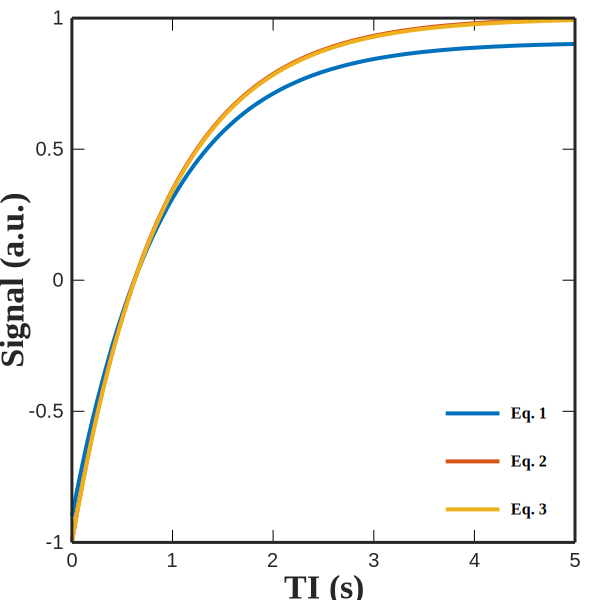

In [5]:
h1.figure = figure(1);

h1.plot{1} = plot(params.TI, signal_II, 'LineWidth', 4); hold on
h1.plot{2} = plot(params.TI, signal_II_IEAT2, 'LineWidth', 4);
h1.plot{3} = plot(params.TI, signal_II_IEAT2_LTR, 'LineWidth', 4);

h1.legend = legend({'Eq. 1', 'Eq. 2', 'Eq. 3'}, 'Location', 'southeast');
h1.xlabel = xlabel('TI (s)');
h1.ylabel = ylabel('Signal (a.u.)');

plotFigureProperties(h1)

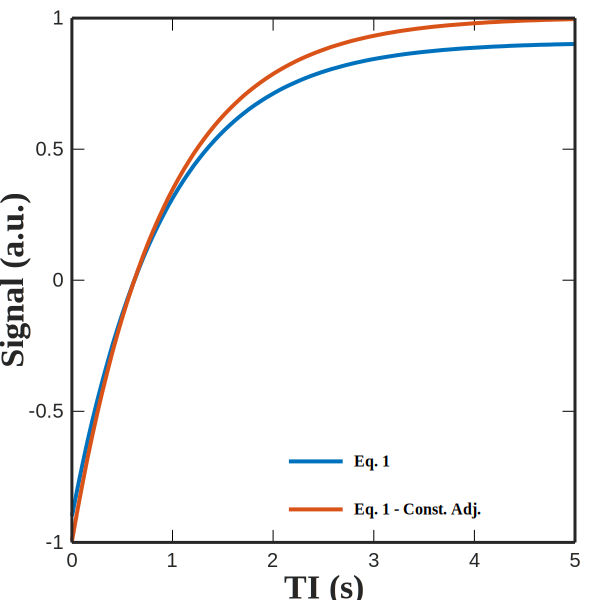

In [6]:
%% Plot comparison of Eq. 1 with it's constant adjusted for T2/FA contributions
%

h2.figure = figure(2);

% Adjust constant by the T2/FA contributions
params.signalConstant = 1 / (exp(-params.TE/params.T2) * sind(params.FA));
assertEqual(size(params.signalConstant), [1, 1]) % Make sure we only added constant TE/T2/FA values.

signal_II_ConstantAdjusted = ir_equations(params, 'IdealInversion');

h2.plot{1} = plot(params.TI, signal_II, 'LineWidth', 4); hold on
h2.plot{2} = plot(params.TI, signal_II_ConstantAdjusted, 'LineWidth', 4);

h2.legend = legend({'Eq. 1','Eq. 1 - Const. Adj.'}, 'Location', 'southeast');
h2.xlabel = xlabel('TI (s)');
h2.ylabel = ylabel('Signal (a.u.)');

plotFigureProperties(h2)
